interation : 0, best_solution: [-2.01364593 -1.69792727], best_fitness:0.07130354154142989
interation : 1, best_solution: [-1.28147506 -1.99193878], best_fitness:-0.09170140606800467
interation : 2, best_solution: [-3.         -2.26333986], best_fitness:0.0005333163031577423
interation : 3, best_solution: [-1.38609057 -2.79249559], best_fitness:-0.003006187105956606
interation : 4, best_solution: [-1.65776035 -1.81214658], best_fitness:0.1231229071894749
interation : 5, best_solution: [-1.47294243 -2.92279656], best_fitness:0.0037614859468281365
interation : 6, best_solution: [-2.88173711 -2.87063794], best_fitness:0.00019298943337976544
interation : 7, best_solution: [-2.01813639 -2.78189489], best_fitness:0.006457908571144215
interation : 8, best_solution: [-2.88281245 -1.04034126], best_fitness:-0.012651763258332664
interation : 9, best_solution: [-2.26872278 -0.2939368 ], best_fitness:-0.5467670477554751
interation : 10, best_solution: [-2.54674954  2.14294948], best_fitness:0.0042

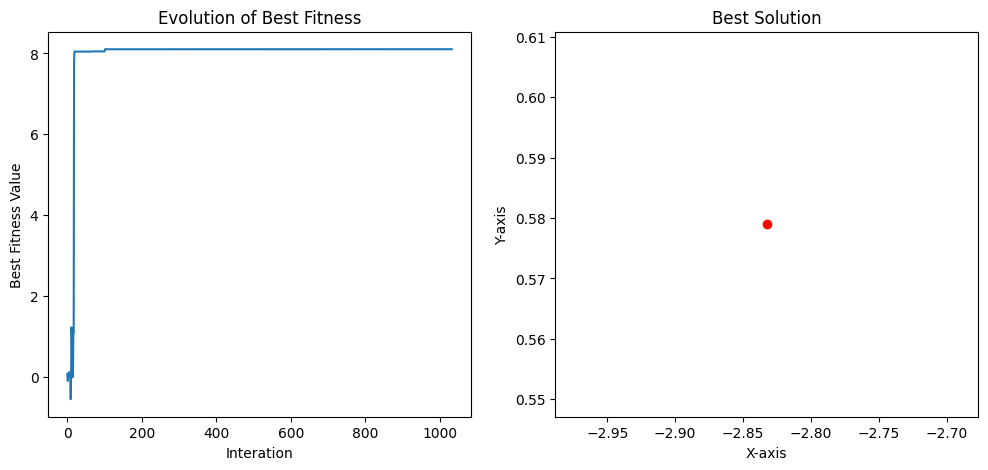

In [1]:
import time
import random
import math
import numpy as np
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------

# Customization section:
initial_temperature = 500
cooling = 0.7  # cooling coefficient
number_variables = 2
upper_bounds = [3, 3]
lower_bounds = [-3, -3]
computing_time = 1  # second(s)

def objective_function(X):
    x = X[0]
    y = X[1]

    value = 3 * (1 - x) ** 2 * math.exp(-x ** 2 - (y + 1) ** 2) - 10 * (x / 5 - x ** 3 - y ** 5) * math.exp(
        -x ** 2 - y ** 2) - 1 / 3 * math.exp(-(x + 1) ** 2 - y ** 2)
    return value
# ------------------------------------------------------------------------------

# Simulated Annealing Algorithm:
initial_solution = np.zeros((number_variables))
for v in range(number_variables):
    initial_solution[v] = random.uniform(lower_bounds[v], upper_bounds[v])

current_solution = initial_solution
best_solution = initial_solution
n = 1  # no of solutions accepted
best_fitness = objective_function(best_solution)
current_temperature = initial_temperature  # current temperature
start = time.time()
no_attempts = 100  # number of attempts in each level of temperature
record_best_fitness = []

for i in range(9999999):
    for j in range(no_attempts):

        for k in range(number_variables):
            current_solution[k] = best_solution[k] + 0.1 * (random.uniform(lower_bounds[k], upper_bounds[k]))
            current_solution[k] = max(min(current_solution[k], upper_bounds[k]), lower_bounds[k])

        current_fitness = objective_function(current_solution)
        E = abs(current_fitness - best_fitness)
        if i==0 and j==0:
            EA = E
        if current_fitness < best_fitness:
            p = math.exp(-E/(EA*current_temperature))
            # make a decision to accept the worse solution or not
            if random.random()<p:
                accept = True
            else:
                accept = False
        else:
            accept = True # accept better solution
        if accept==True:
            best_solution = current_solution # update the best solution
            best_fitness = objective_function(best_solution)
            n = n + 1 # count the solutions accepted
            EA = (EA * (n-1) + E)/n # update EA

    print('interation : {}, best_solution: {}, best_fitness:{}'.format(i, best_solution, best_fitness))
    record_best_fitness.append(best_fitness)
    # Cooling the temperature
    current_temperature = current_temperature * cooling
    # Stop by computing time
    end = time.time()
    if end-start >= computing_time:
        break

        
# Plotting         
# Evolution of Best Fitness        
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(record_best_fitness)
plt.title('Evolution of Best Fitness')
plt.xlabel('Interation')
plt.ylabel('Best Fitness Value')


# Best Solution
plt.subplot(1, 2, 2)
plt.plot(best_solution[0], best_solution[1], 'ro')
plt.title('Best Solution')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()



iteration: 0, best_solution: [-1.60205969 -0.13344312], best_fitness:-2.3520496546689555
iteration: 1, best_solution: [-0.03462902  2.62163737], best_fitness:1.2806314595489923
iteration: 2, best_solution: [-1.92200361  0.11117757], best_fitness:-1.605044459044569
iteration: 3, best_solution: [-0.51426582 -1.61334117], best_fitness:-2.6273431297898027
iteration: 4, best_solution: [-0.16937557 -2.49232911], best_fitness:-1.444246601605063
iteration: 5, best_solution: [ 1.64278704 -2.78665466], best_fitness:-0.04336132927698825
iteration: 6, best_solution: [-0.28593261 -1.94397032], best_fitness:-3.966517375068911
iteration: 7, best_solution: [-2.04255827 -0.93022122], best_fitness:-0.19296741932757996
iteration: 8, best_solution: [-1.43394744 -2.5508716 ], best_fitness:-0.006602736808522869
iteration: 9, best_solution: [-0.41099151 -2.44880656], best_fitness:-1.231698656218245
iteration: 10, best_solution: [ 2.54044527 -0.26570345], best_fitness:0.2824088519051606
iteration: 11, best_so

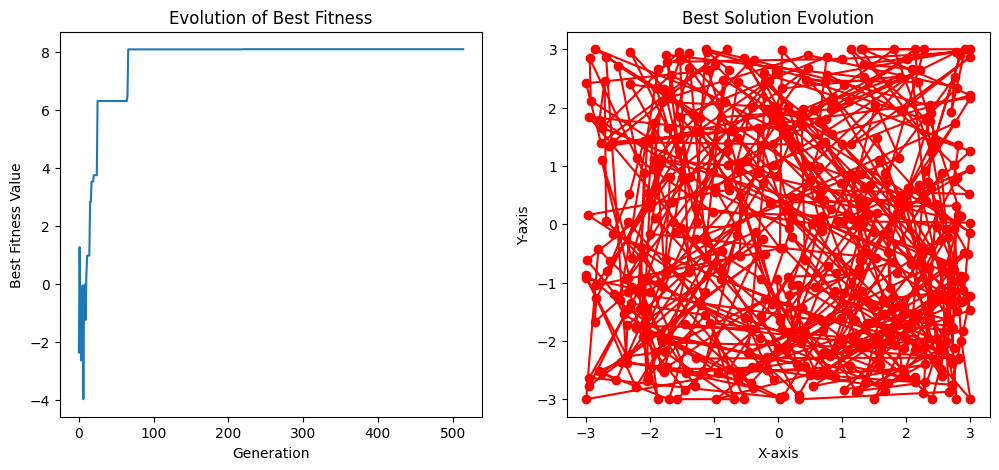

In [2]:
import time
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Customization section:
initial_temperature = 100
cooling = 0.6  # cooling coefficient
number_variables = 2
upper_bounds = [3, 3]
lower_bounds = [-3, -3]
computing_time = .5  # second(s)

def objective_function(X):
    x = X[0]
    y = X[1]
    value = 3 * (1 - x) ** 2 * math.exp(-x ** 2 - (y + 1) ** 2) - 10 * (x / 5 - x ** 3 - y ** 5) * math.exp(
        -x ** 2 - y ** 2) - 1 / 3 * math.exp(-(x + 1) ** 2 - y ** 2)
    return value

# Simulated Annealing Algorithm:
initial_solution = np.zeros((number_variables))
for v in range(number_variables):
    initial_solution[v] = random.uniform(lower_bounds[v], upper_bounds[v])

current_solution = initial_solution
best_solution = initial_solution
n = 1  # no of solutions accepted
best_fitness = objective_function(best_solution)
current_temperature = initial_temperature  # current temperature
start = time.time()
no_attempts = 100  # number of attempts in each level of temperature
record_best_fitness = []

x_values = [] 
y_values = []  

for i in range(9999999):
    for j in range(no_attempts):
        for k in range(number_variables):
            current_solution[k] = best_solution[k] + 0.1 * (random.uniform(lower_bounds[k], upper_bounds[k]))
            current_solution[k] = max(min(current_solution[k], upper_bounds[k]), lower_bounds[k])

        current_fitness = objective_function(current_solution)
        E = abs(current_fitness - best_fitness)
        if i == 0 and j == 0:
            EA = E
        if current_fitness < best_fitness:
            p = math.exp(-E / (EA * current_temperature))
            # make a decision to accept the worse solution or not
            if random.random() < p:
                accept = True
            else:
                accept = False
        else:
            accept = True  # accept better solution
        if accept:
            best_solution = current_solution  # update the best solution
            best_fitness = objective_function(best_solution)
            n += 1  # count the solutions accepted
            EA = (EA * (n - 1) + E) / n  # update EA

    print('iteration: {}, best_solution: {}, best_fitness:{}'.format(i, best_solution, best_fitness))
    record_best_fitness.append(best_fitness)
    x_values.append(best_solution[0])
    y_values.append(best_solution[1])
    
    # Cooling the temperature
    current_temperature = current_temperature * cooling
    # Stop by computing time
    end = time.time()
    if end - start >= computing_time:
        break

# Plotting the evolution of the best solution
plt.figure(figsize=(12, 5))

# Evolution of Best Fitness
plt.subplot(1, 2, 1)
plt.plot(record_best_fitness)
plt.title('Evolution of Best Fitness')
plt.xlabel('Generation')
plt.ylabel('Best Fitness Value')

# Evolution of Best Solution
plt.subplot(1, 2, 2)
plt.plot(x_values, y_values, 'ro-')
plt.title('Best Solution Evolution')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
